In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv('bank.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# Univariate Variable Analysis
* Categorical Variables:job,marital, default, education,housing,loan,contact,poutcome,month,deposit,day
* Numerical Variables: age, campaign,duration, pdays,balance,previous

## Categorical Variable

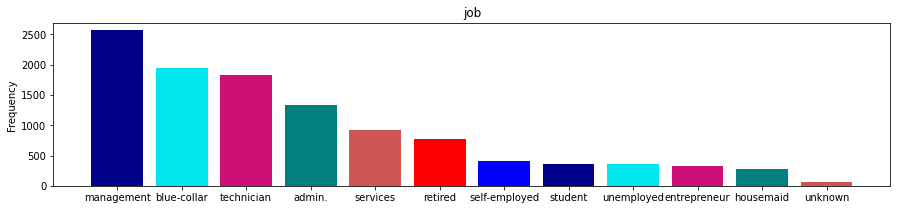

job: 
 management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


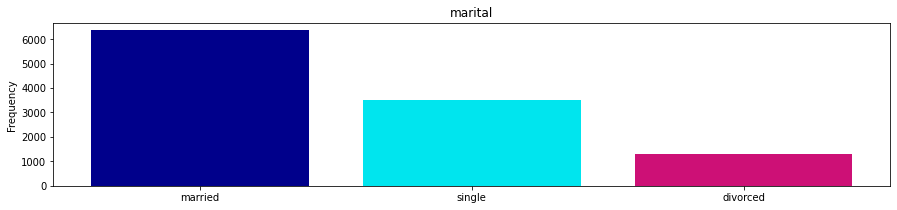

marital: 
 married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


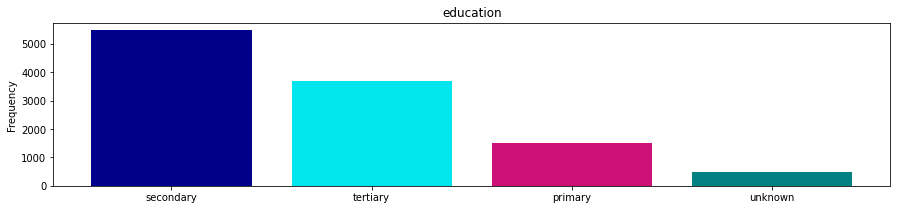

education: 
 secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


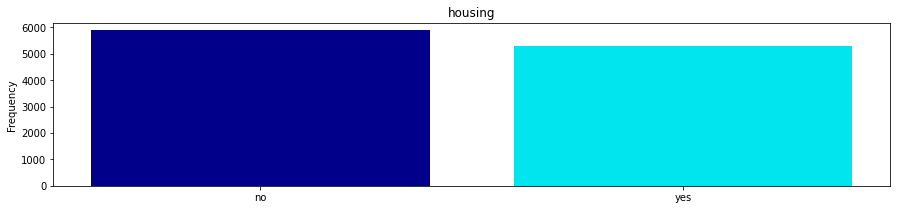

housing: 
 no     5881
yes    5281
Name: housing, dtype: int64


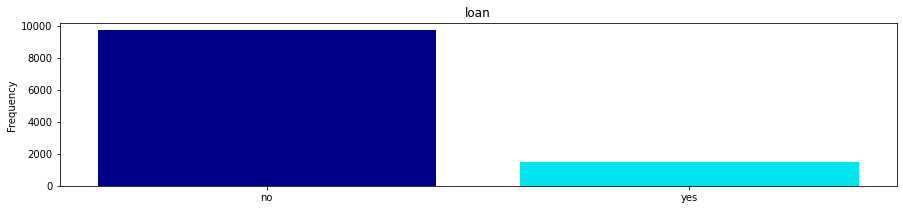

loan: 
 no     9702
yes    1460
Name: loan, dtype: int64


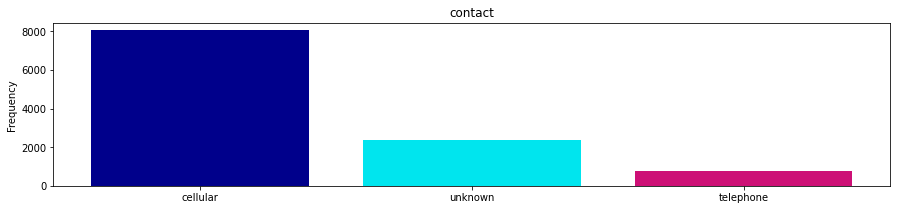

contact: 
 cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


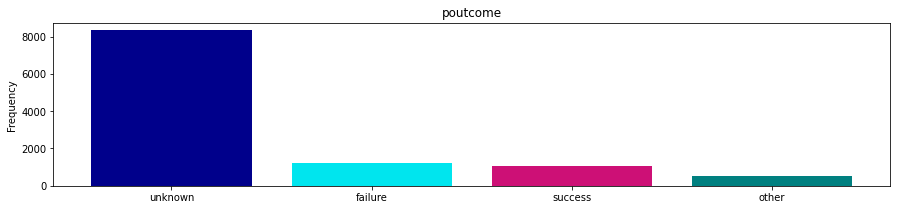

poutcome: 
 unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64


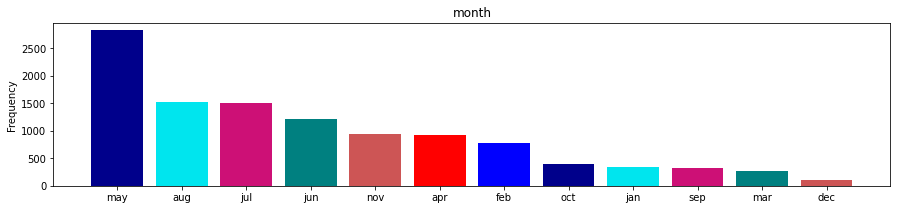

month: 
 may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64


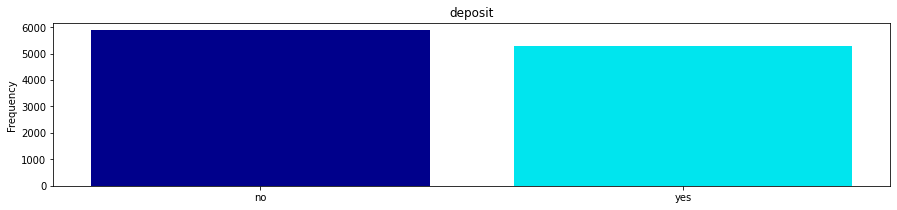

deposit: 
 no     5873
yes    5289
Name: deposit, dtype: int64


In [7]:
import matplotlib.pyplot as plt
def bar_plot(variable):
    var =df[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue',])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))
categoryc = ["job","marital","education", "housing", "loan","contact","poutcome","month","deposit"]
for c in categoryc:
    bar_plot(c)

## Numerical Variable

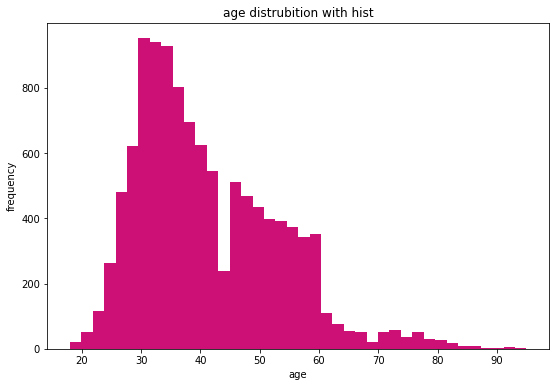

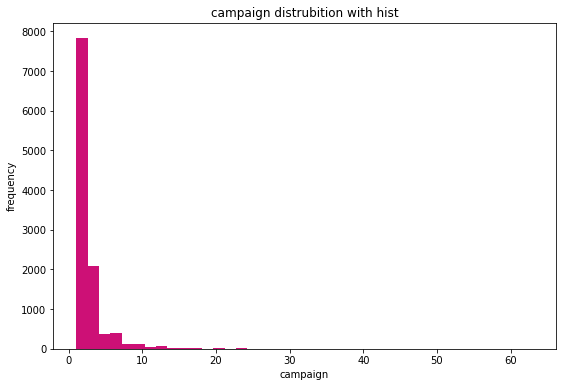

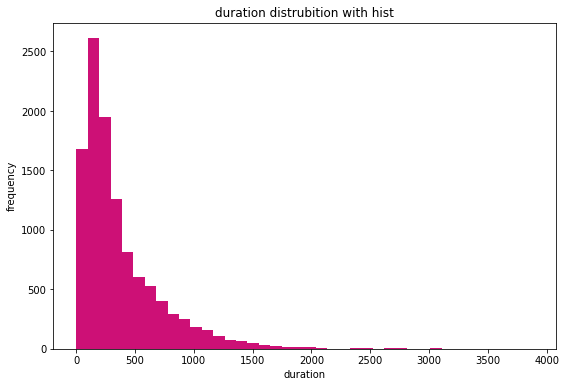

In [9]:
def plot_hist(variable):
    plt.figure(figsize=(9,6))
    plt.hist(df[variable], bins=40,color='#cd1076')
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distrubition with hist".format(variable))
    plt.show()
numericVar = ["age","campaign","duration"]
for n in numericVar:
    plot_hist(n)

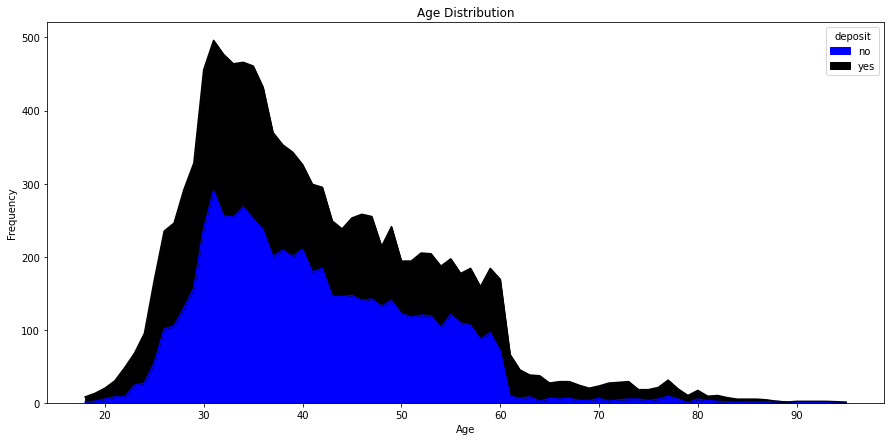

In [11]:
pd.crosstab(df.age,df.deposit).plot(kind="area",figsize=(15,7),color=['#0000ff','#000000' ])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

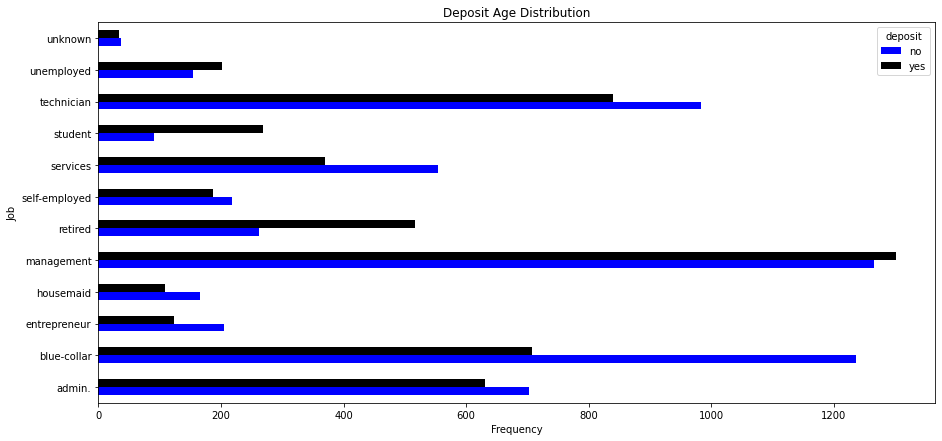

In [12]:
pd.crosstab(df.job,df.deposit).plot(kind="barh",figsize=(15,7),color=['#0000ff','#000000'])
plt.title('Deposit Age Distribution')
plt.xlabel('Frequency')
plt.ylabel('Job')
plt.show()

## Outlier Detection

In [14]:
from collections import Counter
def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

# data.loc[detect_outliers(data,['age','day','duration','campaign','previous'])]

detect_outliers(df,['age','day','duration','campaign','previous'])

[3945]

In [17]:
df.loc[detect_outliers(df,['age','day','duration','campaign','previous'])]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3945,84,retired,married,tertiary,no,4761,no,no,telephone,9,sep,1405,1,92,3,failure,yes


In [19]:
data = df.drop([3945], axis=0)

## Missing Value

In [20]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

##  Correlation matrix

<AxesSubplot:>

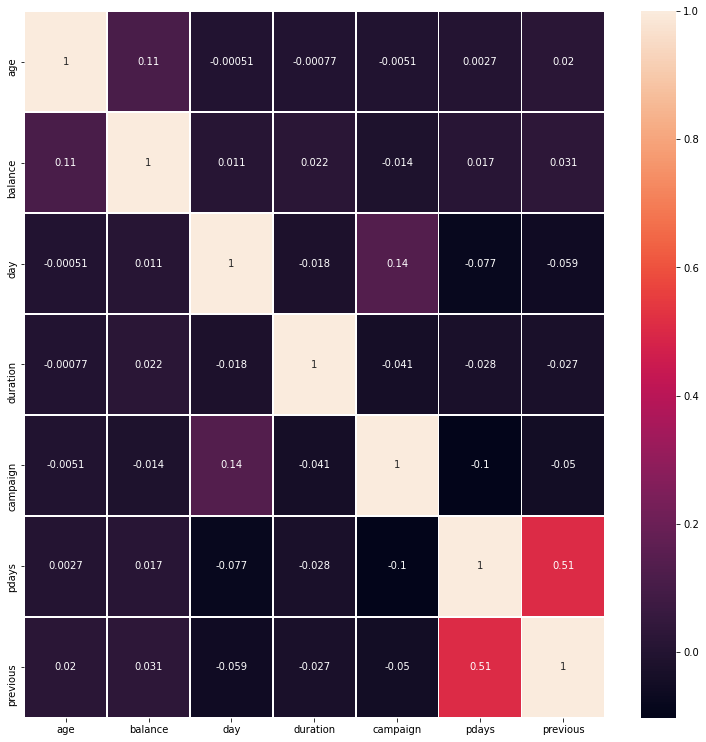

In [21]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(13,13))         # Sample figsize in inches
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

## Calculated correlation between two variables (r) gets a value between -1 and 1.
* No correlaiton r=0
* Very weak correlation: r<0.20
* Weak correlation: between 0.20-0.49
* Moderate correlation: between 0.5-0.79
* Strong correlation: between 0.8-0.99
* Perfect correlation: r=1
## Looking at it, there is a moderate correlation between the days and the previous ones. (r=0.51)

## Data Manipulation
* I do not include the Duration column in the dataset, as it is unknown data at the time of the prediction.
* duration: Talk Time on Last Call

In [22]:
data=data.drop(['duration'],axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


## One-Hot Encoding
* One Hot Encoding means that categorical variables are represented as binary.